#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

In [1]:
import pandas as pd
import numpy as np

# Data Grouping and Aggregation
* Grouping
    * Split-Apply-Combine
    * .groupby()
* Aggregation

Consider having a key feature (Monday-Tuesday- Wednesday) and multiple observed values for each.

Naturally we may want to perform certain calculations (like sum, count, mean, etc.) based on the key values grouped together.
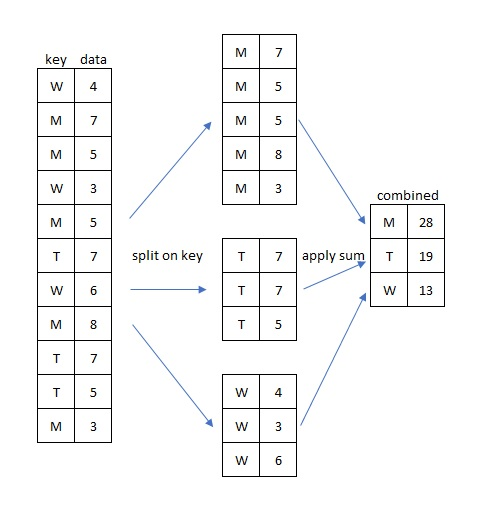

The combined totals per key are
    - Monday:    28
    - Tuesday:   19
    - Wednesday: 13
    
Lets see how we can calculate these using already known methods:

In [2]:
# create the dataframe
df  = pd.DataFrame([['W', 'M', 'M', 'W', 'M', 'T', 'W', 'M', 'T', 'T', 'M'],
                    [4, 7, 5, 3, 5, 7, 6, 8, 7, 5, 3]]).T
df.columns = ['key', 'data']
df

,key,data
0,W,4
1,M,7
2,M,5
3,W,3
4,M,5
5,T,7
6,W,6
7,M,8
8,T,7
9,T,5


In [3]:
# create sub dataframes with same keys and corresponding values grouped together
df_M = df[df['key']=='M']
df_T = df[df['key']=='T']
df_W = df[df['key']=='W']

display(df_M)
display(df_T)
display(df_W)

,key,data
1,M,7
2,M,5
4,M,5
7,M,8
10,M,3


,key,data
5,T,7
8,T,7
9,T,5


,key,data
0,W,4
3,W,3
6,W,6


In [4]:
# calculating the sum for each sub dataframe:
print("Sum for Mondays:   ", df_M['data'].sum())
print("Sum for Tuesdays:  ", df_T['data'].sum())
print("Sum for Wednesdays:", df_W['data'].sum())

Sum for Mondays:    28
Sum for Tuesdays:   19
Sum for Wednesdays: 13


In [5]:
# listing ditinct keys:
#print(df['key'].unique())
key_list = list(df['key'].unique())
key_list.sort()
key_list

['M', 'T', 'W']

In [6]:
# listing the sums in a list
data_list = []
for i in key_list:
    data_list.append(df[df['key']==i]['data'].sum())
data_list

[28, 19, 13]

In [7]:
# create the summary (dataframe)
pd.DataFrame(data_list, key_list, columns=['sum'])

,sum
M,28
T,19
W,13


Instead doing all these, we can use pandas .groupby() method

##### Example using .groupby():

In [8]:
df.groupby('key').sum()

,data
key,
M,28
T,19
W,13


##### Example to use more than one key to group:

In [9]:
# create the dataframe with two keys and more data features
df = pd.DataFrame([['W', 'M', 'M', 'W', 'M', 'T', 'W', 'M', 'T', 'T', 'M'],
                    ['M', 'W', 'W', 'M', 'T', 'T', 'M', 'T', 'W', 'T', 'M'],
                    [3, 5, 7, 8, 6, 7, 5, 3, 5, 7, 4],
                    [4, 7, 5, 3, 5, 7, 6, 8, 7, 5, 3]]).T
df.columns = ['key1', 'key2', 'data1', 'data2']
df

,key1,key2,data1,data2
0,W,M,3,4
1,M,W,5,7
2,M,W,7,5
3,W,M,8,3
4,M,T,6,5
5,T,T,7,7
6,W,M,5,6
7,M,T,3,8
8,T,W,5,7
9,T,T,7,5


In [10]:
df.describe()

,key1,key2,data1,data2
count,11,11,11,11
unique,3,3,6,6
top,M,M,7,7
freq,5,4,3,3


In [11]:
# retrieve dataframe info as stats were not displayed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    11 non-null     object
 1   key2    11 non-null     object
 2   data1   11 non-null     object
 3   data2   11 non-null     object
dtypes: object(4)
memory usage: 480.0+ bytes


In [12]:
# convert data features to numeric
df['data1'] = pd.to_numeric(df['data1'])
df['data2'] = pd.to_numeric(df['data2'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    11 non-null     object
 1   key2    11 non-null     object
 2   data1   11 non-null     int64 
 3   data2   11 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 480.0+ bytes


In [13]:
# stats are now asexpected
df.describe()

,data1,data2
count,11.000000,11.000000
mean,5.454545,5.454545
std,1.694912,1.694912
min,3.000000,3.000000
25%,4.500000,4.500000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,8.000000,8.000000


Groupby one of the 'data' features by one fo the 'key' feature:

In [14]:
df['data1'].groupby(df['key1'])

The result is an object. A groupby object that contains information about the groups.

** .groupby() function **
- splits the data into groups based on a criteria 
- creates objects which can be split on any of their axes
- provides a mapping of labels to group names

Lets how we can use such object:

In [15]:
groupby_object = df['data1'].groupby(df['key1'])
# max in each group:
display(groupby_object.max())

# mean in each group:
display(groupby_object.mean())

# size of each group:
display(groupby_object.size())

key1
M    7
T    7
W    8
Name: data1, dtype: int64

key1
M    5.000000
T    6.333333
W    5.333333
Name: data1, dtype: float64

key1
M    5
T    3
W    3
Name: data1, dtype: int64

Iterate through group objects:

In [16]:
# loop through and print the content:
for item in df.groupby('key1'):
    print('-------------------------')
    display(item)
    print('-------------------------')

-------------------------


('M',
    key1 key2  data1  data2
 1     M    W      5      7
 2     M    W      7      5
 4     M    T      6      5
 7     M    T      3      8
 10    M    M      4      3)

-------------------------
-------------------------


('T',
   key1 key2  data1  data2
 5    T    T      7      7
 8    T    W      5      7
 9    T    T      7      5)

-------------------------
-------------------------


('W',
   key1 key2  data1  data2
 0    W    M      3      4
 3    W    M      8      3
 6    W    M      5      6)

-------------------------


In [17]:
# loop through using two items as it looks like there are two objects/items in each group objects:
for item1, item2  in df.groupby('key1'):
    print('-------------------------')
    display(item1)
    display(item2)
    print('-------------------------')

-------------------------


'M'

,key1,key2,data1,data2
1,M,W,5,7
2,M,W,7,5
4,M,T,6,5
7,M,T,3,8
10,M,M,4,3


-------------------------
-------------------------


'T'

,key1,key2,data1,data2
5,T,T,7,7
8,T,W,5,7
9,T,T,7,5


-------------------------
-------------------------


'W'

,key1,key2,data1,data2
0,W,M,3,4
3,W,M,8,3
6,W,M,5,6


-------------------------


In [18]:
# check if we can find more in each group: no
for item1, item2, item3  in df.groupby('key1'):
    print(item1)
    print(item2)
    print(item3)
    print()

ValueError: not enough values to unpack (expected 3, got 2)

In [19]:
# use meaningful iteration item names:
for key, group in df.groupby('key1'):
    print('-------------------------')
    print(key)
    print(group)
    print('-------------------------')

-------------------------
M
   key1 key2  data1  data2
1     M    W      5      7
2     M    W      7      5
4     M    T      6      5
7     M    T      3      8
10    M    M      4      3
-------------------------
-------------------------
T
  key1 key2  data1  data2
5    T    T      7      7
8    T    W      5      7
9    T    T      7      5
-------------------------
-------------------------
W
  key1 key2  data1  data2
0    W    M      3      4
3    W    M      8      3
6    W    M      5      6
-------------------------


Now check how to iterate through groups when using more than one key:

In [20]:
# itarate using a keypair
for key , group in df.groupby(['key1', 'key2']):
    print('-------------------------')
    display(key)
    display(group)
    print('-------------------------')

-------------------------


('M', 'M')

,key1,key2,data1,data2
10,M,M,4,3


-------------------------
-------------------------


('M', 'T')

,key1,key2,data1,data2
4,M,T,6,5
7,M,T,3,8


-------------------------
-------------------------


('M', 'W')

,key1,key2,data1,data2
1,M,W,5,7
2,M,W,7,5


-------------------------
-------------------------


('T', 'T')

,key1,key2,data1,data2
5,T,T,7,7
9,T,T,7,5


-------------------------
-------------------------


('T', 'W')

,key1,key2,data1,data2
8,T,W,5,7


-------------------------
-------------------------


('W', 'M')

,key1,key2,data1,data2
0,W,M,3,4
3,W,M,8,3
6,W,M,5,6


-------------------------


Note that the displayed keypair seem to be separable

In [21]:
# iterate using a keypair as a touple: (key_1, key_2)
for (key_1, key_2), group in df.groupby(['key1', 'key2']):
    print('-------------------------')
    print(key_1, "and",  key_2)
    display(group)
    print('-------------------------')

-------------------------
M and M


,key1,key2,data1,data2
10,M,M,4,3


-------------------------
-------------------------
M and T


,key1,key2,data1,data2
4,M,T,6,5
7,M,T,3,8


-------------------------
-------------------------
M and W


,key1,key2,data1,data2
1,M,W,5,7
2,M,W,7,5


-------------------------
-------------------------
T and T


,key1,key2,data1,data2
5,T,T,7,7
9,T,T,7,5


-------------------------
-------------------------
T and W


,key1,key2,data1,data2
8,T,W,5,7


-------------------------
-------------------------
W and M


,key1,key2,data1,data2
0,W,M,3,4
3,W,M,8,3
6,W,M,5,6


-------------------------


## Aggregation
* Data transformation
* Produces scalar values
* Examples:
    * count
    * sum
    * min, max
    * mean, median
    * std, var
    * ...

##### Example:

In [22]:
# 'agg' is an alias for 'aggregate', both work the same
groupby_object.agg('sum')

key1
M    25
T    19
W    16
Name: data1, dtype: int64

In [ ]:
# 'agg' is an alias for 'aggregate', both work the same
groupby_object.agg(['min', 'max'])

In [ ]:
# 'agg' is an alias for 'aggregate', both work the same
groupby_object.agg(['count', 'min', 'max', 'mean', 'std'])

In [ ]:
# better display by rounding applied to the whole aggregate
round(groupby_object.agg(['count', 'min', 'max', 'mean', 'std']), 2)

#### Homework 16.1:
Aggregated mean
- Calculate aggregated means of 'Height' and 'Weight' of 'Legendary Type' of Pokemon


In [ ]:
# Homework 16.1 code comes here:

df = pd.read_csv('assignment/3/pokemon.csv', encoding='ansi')
round(df.groupby('Legendary Type').mean()[['Height', 'Weight']], 2)

#### Homework 16.2:
Aggregated mean of a key pair
- Calculate aggregated means of 'Height' and 'Weight' of 'Legendary Type' and 'Classification' type of Pokemon
- Display only results where the Weight is greater than 100

In [ ]:
# Homework 16.2 code comes here:

df = pd.read_csv('assignment/3/pokemon.csv', encoding='ansi')
result = round(df.groupby(['Legendary Type', 'Classification']).mean()[['Height', 'Weight']], 2)
display(result)
result[(result['Weight'] >= 100) & (result['Height'] <= 2)]
